This notebook reads the the calibration runs and plots the relevant data. It is a preliminary script. Until we find out an optimal way. 

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import cartopy.crs as ccrs
import cartopy.feature as cpf 
import xarray as xr 
import os 
import pandas as pd
# import seaborn as sns
# sns.set_theme("notebook") 
import sys
sys.path.append('/u/vasulkar/p_emodnet_amey/Regional_canada_model/')
path1=sys.path[-1]
print(path1)

/u/vasulkar/p_emodnet_amey/Regional_canada_model/


First step is parameter plotting. Plotting of number of params and their values. 
We are treating horizontal viscosity here. 

Polygon details

In [169]:
#Definition of parameters
#polygon parameters
lon1=-99.0;lon2=-77.0
lat1=50.0;lat2=64.0
coords=[(lon1, lat1), (lon1,lat2), (lon2,lat2), (lon2, lat1),(lon1, lat1)]
poly = Polygon(coords)
print(poly)

POLYGON ((-99 50, -99 64, -77 64, -77 50, -99 50))


In [173]:
runsfolder=os.path.join(path1,'model_runs','snellius_runs','OpenDAruns')
print(runsfolder)
simfolder=runsfolder+'/vis_30para_32Tg_model/'
optmodelfolder=simfolder+'stochModel/work42/'
paramfile=optmodelfolder+'horizontaleddy_correction_template_30.xyz'
print(paramfile)
# fname='horizontaleddy_correction_template_6.xyz'
lon=np.loadtxt(paramfile,usecols=0)
lat=np.loadtxt(paramfile,usecols=1)
param=np.loadtxt(paramfile,usecols=2) 

/u/vasulkar/p_emodnet_amey/Regional_canada_model/model_runs/snellius_runs/OpenDAruns
/u/vasulkar/p_emodnet_amey/Regional_canada_model/model_runs/snellius_runs/OpenDAruns/vis_30para_32Tg_model/stochModel/work42/horizontaleddy_correction_template_30.xyz


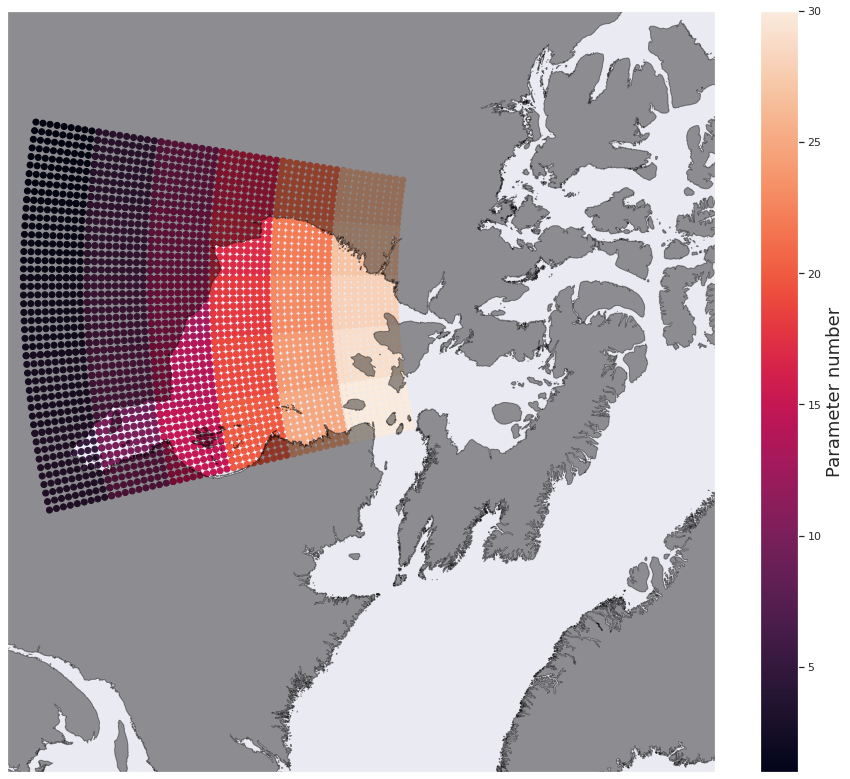

In [182]:
  
# marking the x-axis and y-axis 
fig=plt.figure(figsize=(20, 14), frameon=True)
proj=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)
ax1=fig.add_subplot(1,1,1,projection=proj) 
ax1.set_extent((-105, -62, 49, 75), crs=ccrs.PlateCarree())
cbarlabel='Parameter number' 
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=0.4)
ax1.add_feature(feature)
# contour_opts = {'levels': np.linspace(0,8,50),
#                 'cmap':'viridis','transform':ccrs.PlateCarree(),'alpha':1}
# cont=ax1.tricontour(triang,scorrval,**contour_opts)
# fig.colorbar(cont)
# cm = plt.get_cmap('gist_rainbow')
# NUM_COLORS=32
# ax1.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
cont1=ax1.scatter(lon,lat,c=param,transform=ccrs.PlateCarree(),marker='o',vmin=1,vmax=30)
cbar=fig.colorbar(cont1,fraction=0.078, pad=0.04)
# ax1.add_geometries([poly], crs=ccrs.PlateCarree(),  edgecolor='red', alpha=0.4)
cbar.set_label(cbarlabel, rotation=90, fontsize=18)
# cbar.ax.tick_params(labelsize=18)
plt.show()

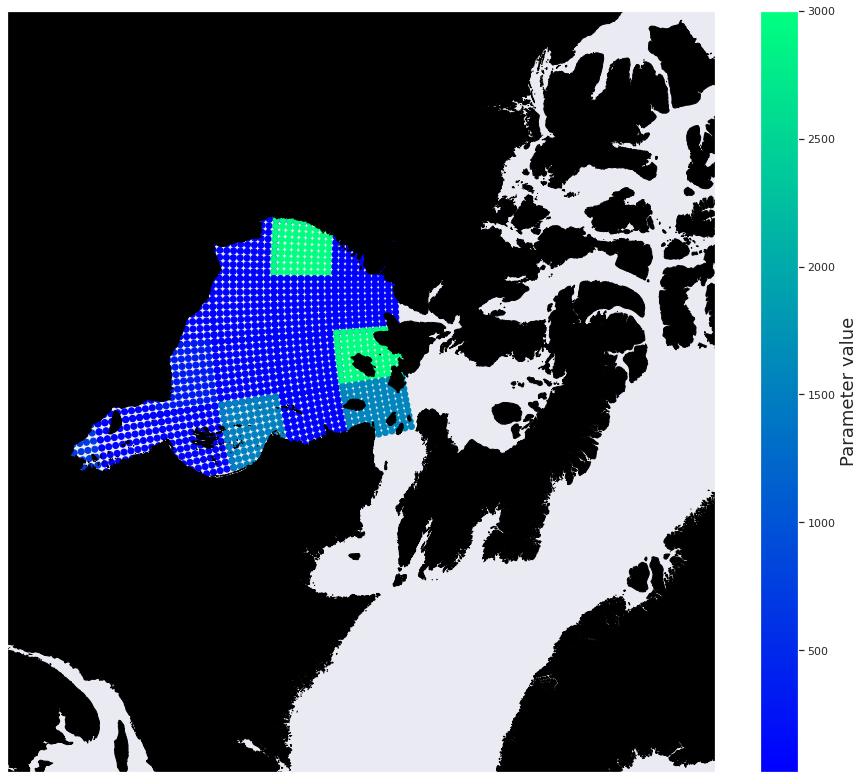

In [187]:
paramvalfile=optmodelfolder+'horizontaleddy_correction_30.xyz'

# fname='horizontaleddy_correction_template_6.xyz'
lon=np.loadtxt(paramvalfile,usecols=0)
lat=np.loadtxt(paramvalfile,usecols=1)
paramval=np.loadtxt(paramvalfile,usecols=2) 
  
# marking the x-axis and y-axis 
fig=plt.figure(figsize=(20, 14), frameon=True)
proj=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)
ax1=fig.add_subplot(1,1,1,projection=proj) 
ax1.set_extent((-105, -62, 49, 75), crs=ccrs.PlateCarree())
cbarlabel='Parameter value' 
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1)
ax1.add_feature(feature)
# contour_opts = {'levels': np.linspace(0,8,50),
#                 'cmap':'viridis','transform':ccrs.PlateCarree(),'alpha':1}
# cont=ax1.tricontour(triang,scorrval,**contour_opts)
# fig.colorbar(cont)

cont1=ax1.scatter(lon,lat,c=paramval,transform=ccrs.PlateCarree(),cmap='winter',marker='o',vmin=25.0,vmax=3000.0)
cbar=fig.colorbar(cont1,fraction=0.078, pad=0.04)
# ax1.add_geometries([poly], crs=ccrs.PlateCarree(),  edgecolor='red', alpha=0.4)
cbar.set_label(cbarlabel, rotation=90, fontsize=18)
# cbar.ax.tick_params(labelsize=18)
plt.show()

Testing waterlevel obs versus opt. 

In [188]:
#reading model output. 
# simfolder=runsfolder+'/vis_9para_32TG_model/'
# optmodelfolder=simfolder+'stochModel/work20/'
inimodelfolder=simfolder+'stochModel/work2/'
inihisfile=inimodelfolder+'output/canada_model_0000_his.nc'
opthisfile=optmodelfolder+'output/canada_model_0000_his.nc'
inimoddata=xr.open_dataset(inihisfile)
inihmod=inimoddata.waterlevel
time=inimoddata.time

optmoddata=xr.open_dataset(opthisfile)
opthmod=optmoddata.waterlevel
xynfile=inimodelfolder+'TGObs_Mar_HB.xyn'
headerlist=["Lon","Lat","Name"]
df=pd.read_csv(xynfile,delim_whitespace=True,names=headerlist,quotechar="'")
stationname=df['Name']

In [189]:
from sklearn.metrics import mean_squared_error
import math

In [190]:
#reading obs
obsfolder=os.path.join(path1,'model_development','Openda_models','Observations','CHSTG','March_Hudsonbay')
#compare obs to model. 
inirmsevec=[]
optrmsevec=[]
for i in range(len(stationname)):
    station=stationname[i]
    print(station)
    #getting obs data
    for file in os.listdir(obsfolder):
        if file[-2:]=='wl':
            if file[:-3]==station:
                print(file)
                tgfile=obsfolder+'/'+file
                headerlist=["time","SSH"]
                df=pd.read_csv(tgfile,delim_whitespace=True,names=headerlist,quotechar="'",skiprows=1)
                df.head()
                htg=np.array(df['SSH'])
                #removing the mean.
                htg=htg-htg.mean()
    #gettting mod data
    inihtg=np.array(inihmod[:,i])
    opthtg=np.array(opthmod[:,i])
    #initial rmse
    inimsetg=mean_squared_error(htg,inihtg)
    inirmsetg=math.sqrt(inimsetg)
    inirmsevec=np.append(inirmsevec,inirmsetg)
    #opt rmse
    optmsetg=mean_squared_error(htg,opthtg)
    optrmsetg=math.sqrt(optmsetg)
    optrmsevec=np.append(optrmsevec,optrmsetg)
        # df=pd.read_csv(tgfile)
        # df.head()

shortstaname=np.array([stationname[i][:-4] for i in range(len(stationname))])
shortstaname=np.delete(shortstaname,3)
inirmsevec=np.delete(inirmsevec,3)
optrmsevec=np.delete(optrmsevec,3)

Akulivik_Mar
Akulivik_Mar.wl
Panorama Island_Mar
Panorama Island_Mar.wl
Eastmain River_Mar
Eastmain River_Mar.wl
Bear Island_Mar
Bear Island_Mar.wl
Marble Island_Mar
Marble Island_Mar.wl
North Kopak Island_Mar
North Kopak Island_Mar.wl
Innetalling Island_Mar
Innetalling Island_Mar.wl
La Grande Riviere _Mar
La Grande Riviere _Mar.wl
Long Island_Mar
Long Island_Mar.wl
Winisk_Mar
Winisk_Mar.wl
Kuujjuarapik_Mar
Kuujjuarapik_Mar.wl
Churchill_Mar
Churchill_Mar.wl
Whale Cove_Mar
Whale Cove_Mar.wl
Chesterfield Inlet_Mar
Chesterfield Inlet_Mar.wl
Charlton Island_Mar
Charlton Island_Mar.wl
Digges Harbour_Mar
Digges Harbour_Mar.wl
Sanikiluaq_Mar
Sanikiluaq_Mar.wl
Sand Head_Mar
Sand Head_Mar.wl
Moosonee_Mar
Moosonee_Mar.wl
Port De Boucherville_Mar
Port De Boucherville_Mar.wl
Stag Island_Mar
Stag Island_Mar.wl
Arviat_Mar
Arviat_Mar.wl
Roggan River_Mar
Roggan River_Mar.wl
Inukjuak_Mar
Inukjuak_Mar.wl
Bear Island_Mar
Bear Island_Mar.wl
Rankin Inlet_Mar
Rankin Inlet_Mar.wl
Hook Island_Mar
Hook Island_

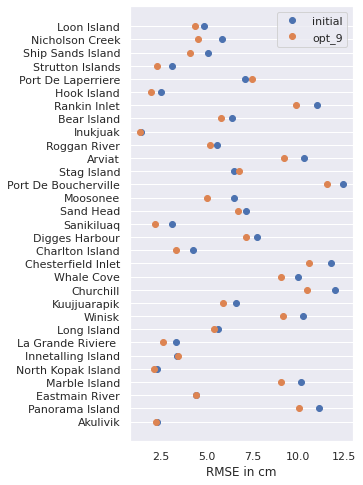

In [191]:
fig,ax=plt.subplots(figsize=(4,32//4))
ax.set_axisbelow(True)
ax.plot(inirmsevec*10.,shortstaname,marker='o',linestyle='None',label='initial')
ax.plot(optrmsevec*10.,shortstaname,marker='o',linestyle='None',label='opt_9')
# plt.plot(optrmsevec)
ax.xaxis.grid(color='gray', linestyle='-')

ax.set_xlabel('RMSE in cm')
ax.legend()

plt.show()

plotting the cost function

In [192]:
# simfolder=runsfolder+'/vis_9para_32TG_model/'
resfile=simfolder+'results_dud.csv'
df=pd.read_csv(resfile,delimiter='\t',quotechar="'")
df.head()
# 

,Iteration Cost,vi_1,vi_2,vi_3,vi_4,vi_5,vi_6,vi_7,vi_8,vi_9,...,vi_21,vi_22,vi_23,vi_24,vi_25,vi_26,vi_27,vi_28,vi_29,vi_30
1,1.003451e+07,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
2,1.003451e+07,1025.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
3,1.003451e+07,25.0,1025.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
4,1.003451e+07,25.0,25.0,1025.0,25.0,25.0,25.0,25.0,25.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
5,1.004095e+07,25.0,25.0,25.0,1025.0,25.0,25.0,25.0,25.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0


In [193]:
key=df.keys()
costfuncvec=df[key[0]]
index=np.linspace(0,len(costfuncvec),len(costfuncvec)+1)



Text(0, 0.5, 'Cost function value')

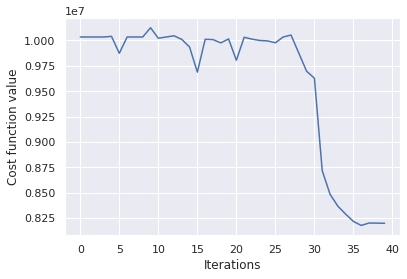

In [194]:
plt.plot(index[:-3],costfuncvec[:-2])
plt.xlabel('Iterations')
plt.ylabel('Cost function value')